In [104]:
import pandas as pd 
import fastf1 as ff1

import matplotlib.pyplot as plt 
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np


#ff1.Cache.enable_cache('../cache')

race = ff1.get_session(2021, 'France', 'R')
 



In [105]:
laps = race.load_laps(with_telemetry = True)

laps.head().T

core           INFO 	Loading laps for French Grand Prix - Race [v2.1.13]
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
core           INFO 	Loaded data for 20 drivers: ['33', '99', '9', '44', '63', '55', '16', '11', '31', '10', '4', '6', '77', '5', '47', '7', '3', '18', '14', '22']


,0,1,2,3,4
Time,0 days 00:35:12.811000,0 days 00:36:52.424000,0 days 00:38:31.995000,0 days 00:40:12.019000,0 days 00:41:51.427000
DriverNumber,33,33,33,33,33
LapTime,NaT,0 days 00:01:39.613000,0 days 00:01:39.571000,0 days 00:01:40.024000,0 days 00:01:39.408000
LapNumber,1,2,3,4,5
Stint,1,1,1,1,1
PitOutTime,0 days 00:00:06.489000,NaT,NaT,NaT,NaT
PitInTime,NaT,NaT,NaT,NaT,NaT
Sector1Time,NaT,0 days 00:00:25.323000,0 days 00:00:25.417000,0 days 00:00:25.489000,0 days 00:00:25.362000
Sector2Time,0 days 00:00:29.563000,0 days 00:00:29.545000,0 days 00:00:29.755000,0 days 00:00:29.675000,0 days 00:00:29.678000
Sector3Time,0 days 00:00:44.929000,0 days 00:00:44.745000,0 days 00:00:44.399000,0 days 00:00:44.860000,0 days 00:00:44.368000


In [106]:
laps.describe()

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,LapStartTime
count,1051,1031,1051.000000,1051.000000,42,23,1031,1051,1051,1031,1051,1051,935.000000,1051.000000,1029.000000,1051.000000,1017.000000,1051
mean,0 days 01:18:39.765603235,0 days 00:01:40.399747817,26.777355,1.664129,0 days 00:39:03.161904761,0 days 01:10:40.309478260,0 days 00:00:25.532648884,0 days 00:00:29.887274976,0 days 00:00:45.019470980,0 days 01:18:15.364360814,0 days 01:17:54.747301617,0 days 01:18:39.768707897,105.105882,275.931494,294.362488,302.173168,15.117011,0 days 01:16:59.146274976
std,0 days 00:25:25.357230173,0 days 00:00:03.334203532,15.178428,0.600347,0 days 00:37:34.420678498,0 days 00:15:34.381669966,0 days 00:00:00.715719150,0 days 00:00:00.461620098,0 days 00:00:02.974318516,0 days 00:24:56.647315489,0 days 00:25:25.904423513,0 days 00:25:25.351930148,3.782994,3.721376,5.698811,12.452442,8.924502,0 days 00:25:26.628879989
min,0 days 00:35:11.344000,0 days 00:01:36.404000,1.000000,1.000000,0 days 00:00:06.489000,0 days 00:32:01.095000,0 days 00:00:24.511000,0 days 00:00:28.805000,0 days 00:00:42.846000,0 days 00:35:36.608000,0 days 00:34:26.829000,0 days 00:35:11.545000,91.000000,230.000000,262.000000,223.000000,1.000000,0 days 00:33:26.312000
25%,0 days 00:56:48.256000,0 days 00:01:38.977000,14.000000,1.000000,0 days 00:00:06.489000,0 days 01:01:47.834000,0 days 00:00:25.126000,0 days 00:00:29.610000,0 days 00:00:44.078500,0 days 00:56:12.424500,0 days 00:56:03.683000,0 days 00:56:48.256000,103.000000,274.000000,291.000000,295.000000,8.000000,0 days 00:55:08.868000
50%,0 days 01:19:06.338000,0 days 00:01:39.930000,27.000000,2.000000,0 days 00:58:26.801000,0 days 01:04:02.090000,0 days 00:00:25.435000,0 days 00:00:29.853000,0 days 00:00:44.569000,0 days 01:18:10.791000,0 days 01:18:21.881000,0 days 01:19:06.338000,105.000000,276.000000,293.000000,299.000000,14.000000,0 days 01:17:26.554000
75%,0 days 01:40:53.296000,0 days 00:01:41.047500,40.000000,2.000000,0 days 01:05:06.169000,0 days 01:23:33.378000,0 days 00:00:25.738500,0 days 00:00:30.139500,0 days 00:00:45.149000,0 days 01:39:54.944000,0 days 01:40:08.952000,0 days 01:40:53.296000,108.000000,278.000000,296.000000,305.000000,21.000000,0 days 01:39:13.801500
max,0 days 02:02:31.610000,0 days 00:02:03.242000,53.000000,3.000000,0 days 01:38:01.090000,0 days 01:37:29.388000,0 days 00:00:31.413000,0 days 00:00:32.840000,0 days 00:01:06.437000,0 days 02:01:16.179000,0 days 02:01:46.770000,0 days 02:02:31.610000,120.000000,291.000000,321.000000,349.000000,37.000000,0 days 02:00:50.684000


In [107]:
#finding the fastest lap

laps.loc[laps['LapTime']== min(laps['LapTime'].dropna())]


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
34,0 days 01:31:44.071000,33,0 days 00:01:36.404000,35,3,NaT,NaT,0 days 00:00:24.512000,0 days 00:00:28.969000,0 days 00:00:42.923000,...,309.0,MEDIUM,6.0,False,0 days 01:30:07.667000,Red Bull,VER,1,True,2021-06-20 14:00:07.675


In [108]:
#laps['Compounds'].value_counts()

In [109]:
laps[['Team', 'Driver', 'LapTime']].groupby(['Team', 'Driver']).mean().sort_values(['Team', 'LapTime'])

LapTime
Team           Driver                          
Alfa Romeo     GIO    0 days 00:01:40.984333333
               RAI    0 days 00:01:41.075843137
AlphaTauri     GAS    0 days 00:01:40.237326923
               TSU    0 days 00:01:40.830254901
Alpine F1 Team ALO    0 days 00:01:40.245673076
               OCO    0 days 00:01:40.911666666
Aston Martin   VET    0 days 00:01:40.242096153
               STR    0 days 00:01:40.436807692
Ferrari        SAI       0 days 00:01:40.698000
               LEC    0 days 00:01:41.098764705
Haas F1 Team   MSC    0 days 00:01:41.636176470
               MAZ    0 days 00:01:41.901490196
McLaren        NOR    0 days 00:01:39.966653846
               RIC    0 days 00:01:40.197634615
Mercedes       HAM    0 days 00:01:38.919519230
               BOT    0 days 00:01:39.106826923
Red Bull       VER    0 days 00:01:38.835211538
               PER    0 days 00:01:38.967769230
Williams       RUS    0 days 00:01:40.752921568
               LAT    0 days 00:01:41.078294117

In [110]:
laps[['Driver', 'SpeedST']].groupby(['Driver']).max().sort_values('SpeedST', ascending=False)

,SpeedST
Driver,
NOR,349.0
VER,337.0
VET,336.0
PER,336.0
GAS,334.0
RUS,334.0
RIC,334.0
RAI,334.0
STR,333.0


In [111]:
session = ff1.get_session(2021, 'France', 'Q')

lap = laps.pick_fastest()
tel = lap.get_telemetry()

session

In [112]:
#plotting prep

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

In [113]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
#lc_comp.set_linewidth()

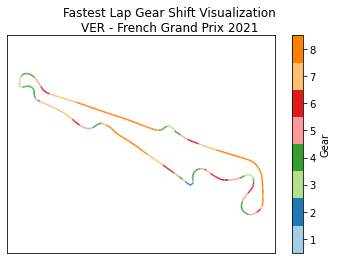

In [114]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.weekend.name} {session.weekend.year}"
)
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

/var/folders/sv/v002sx6n7r57yl0d615d6b6c0000gn/T/ipykernel_6133/3174691261.py:1: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))


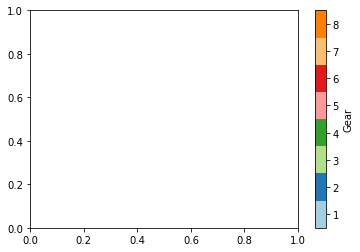

In [115]:
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

In [116]:
races = ff1.get_session(2020, 'Turkey', 'R')
laps_r = races.load_laps()
lec = laps_r.pick_driver('LEC')
ham = laps_r.pick_driver('HAM')
nor = laps_r.pick_driver('NOR')
ric = laps_r.pick_driver('RIC')

core           INFO 	Loading laps for Turkish Grand Prix - Race [v2.1.13]
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching weather data...
core           INFO 	Loaded data for 20 drivers: ['18', '33', '11', '23', '3', '44', '31', '7', '77', '99', '5', '16', '20', '4', '55', '26', '8', '6', '10', '63']


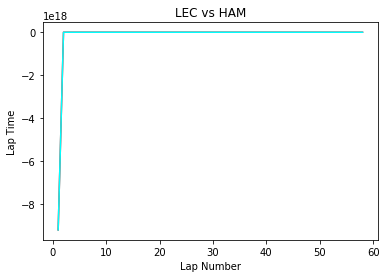

In [117]:
fig, ax = plt.subplots()
ax.plot(lec['LapNumber'], lec['LapTime'], color='red')
ax.plot(ham['LapNumber'], ham['LapTime'], color='cyan')
ax.set_title("LEC vs HAM")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.show()


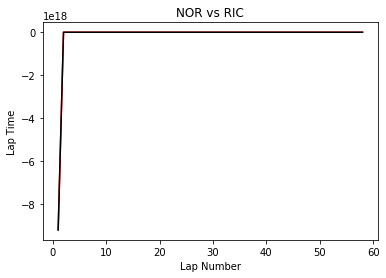

In [118]:
fig, ax = plt.subplots()
ax.plot(nor['LapNumber'], lec['LapTime'], color='red')
ax.plot(ric['LapNumber'], ham['LapTime'], color='black')
ax.set_title("NOR vs RIC")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.show()
